In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
import pickle

pd.set_option('display.max_columns',None)

In [5]:
data=pd.read_csv("liver_patient_data.csv")

In [6]:

%who DataFrame


data	 


In [7]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [10]:
data.shape

(583, 11)

In [11]:
# converting the object type data to numeric data
m={'Female':0,'Male':1}
data['Gender']=data['Gender'].map(m)

In [12]:
# checking missing values 
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [13]:
data=data.dropna()

In [14]:
data.shape

(579, 11)

In [15]:
i=0
for column in data:
    print(column)
    i=i+1
print(i)

Age
Gender
Total_Bilirubin
Direct_Bilirubin
Alkaline_Phosphotase
Alamine_Aminotransferase
Aspartate_Aminotransferase
Total_Protiens
Albumin
Albumin_and_Globulin_Ratio
Dataset
11


In [16]:
data.duplicated().sum()

13

In [17]:
data.drop_duplicates()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


<font size =08> EDA</font>

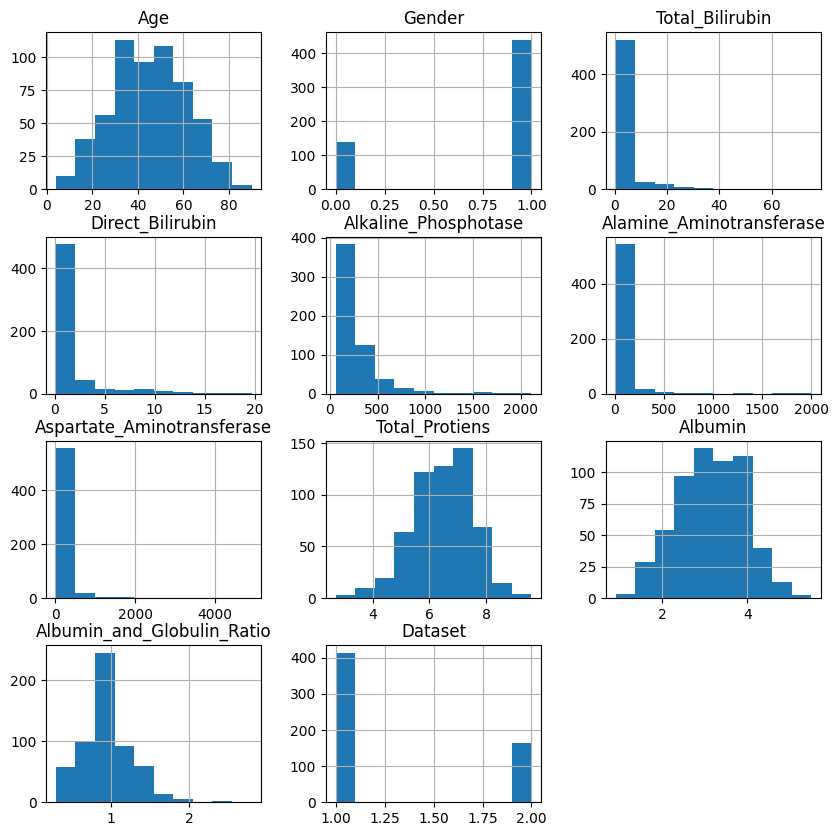

In [18]:
# Visualizations
# Histograms of Numerical Features
data.hist(figsize=(10,10))
plt.show()


<font size=08>Insights</font></br>
<font size=4>
<div style="line-height: 2;">
1.Age: The data shows a relatively even distribution, with a higher concentration of individuals in the 30-60 age range. </br>
2.Gender: There is an imbalance in the dataset, with more entries for one gender (possibly males).</br>
3.Total Bilirubin: Most individuals have low total bilirubin levels, with a few outliers showing higher values.</br>
4.Direct Bilirubin: Similar to total bilirubin, most values are low, with some cases showing elevated levels.</br>
5.Alkaline Phosphatase: The distribution is heavily right-skewed, indicating most people have low enzyme levels, but a few have significantly higher values.</br>
6.Alamine Aminotransferase: Highly right-skewed, with most values close to zero and a few individuals showing elevated liver enzyme levels.</br>
7.Aspartate Aminotransferase: Extremely right-skewed, indicating that most individuals have very low levels, with a few outliers.</br>
8.Total Proteins: Fairly normal distribution around the 6-8 g/dL range, which is typical for healthy individuals.</br>
9.lbumin: A moderately normal distribution centered around common clinical reference ranges for albumin levels.</br>
10.Albumin_and_Globulin_Ratio: The distribution is right-skewed, with most values around 1, suggesting a typical albumin-to-globulin ratio, but some individuals show higher ratios.</br>
11.Dataset: The data is heavily imbalanced, with most individuals categorized as 1 and fewer as 2, indicating a classification split (possibly healthy vs. liver patients).</br>
</div></font>

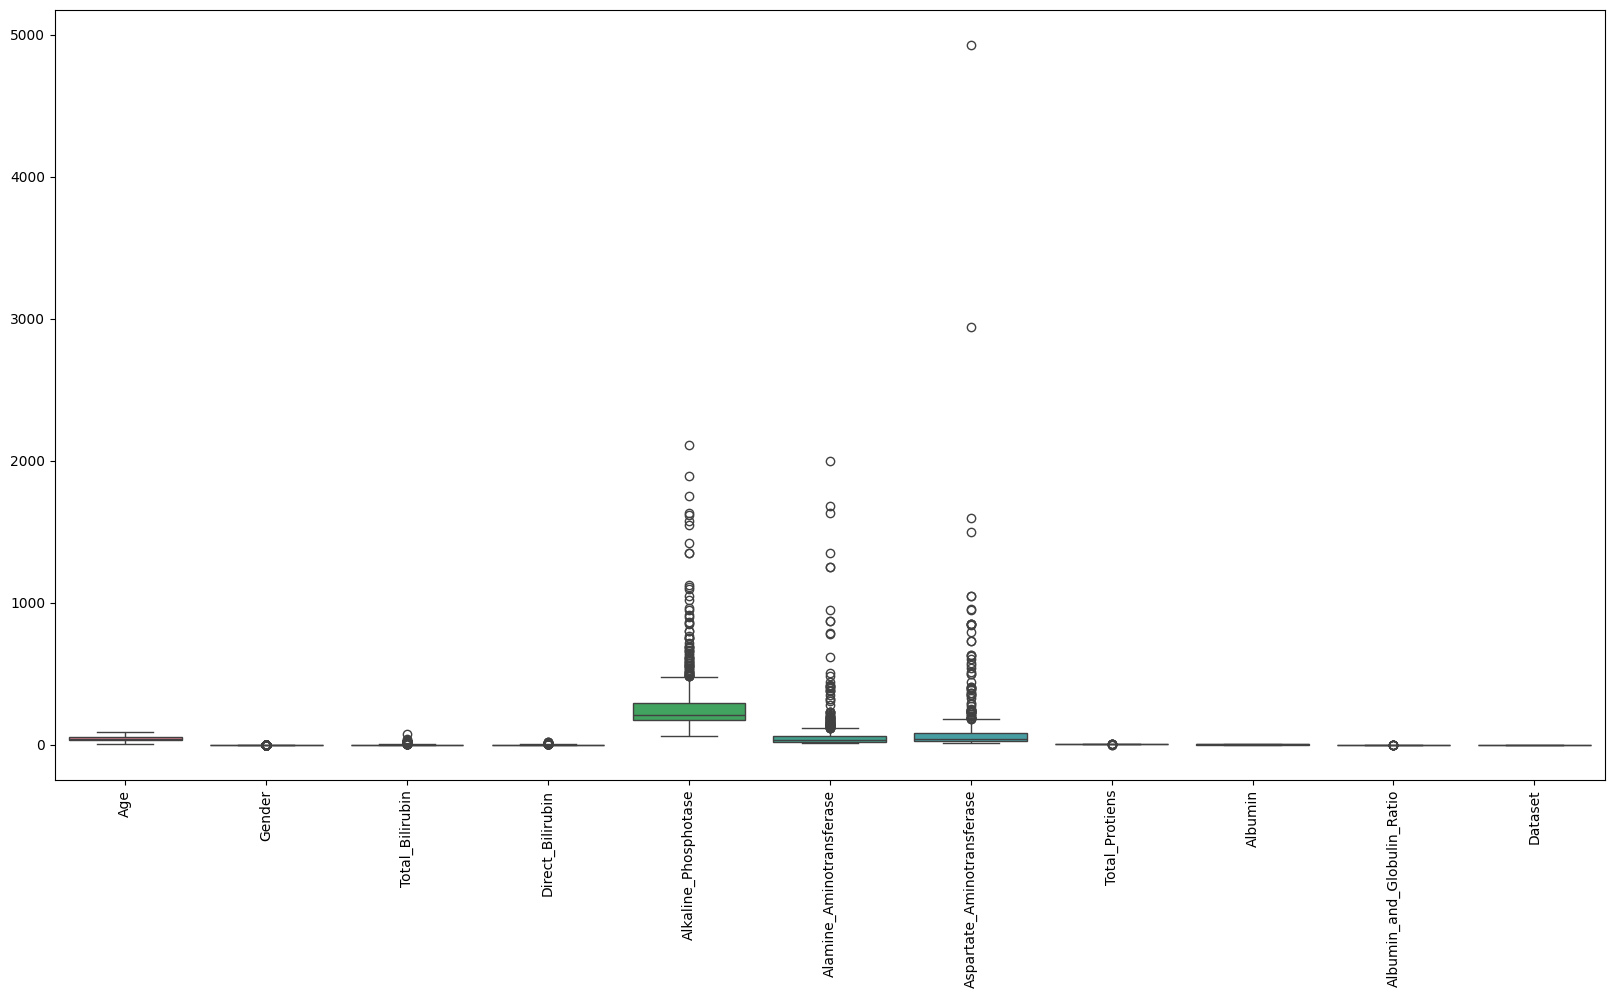

In [19]:
# Visualize feature importances
plt.figure(figsize=(20, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

<font size=08>Insights from Boxplot</font></br>
<font size=4>
<div style="line-height: 2;">
1.Alkaline_Phosphotase: Numerous high outliers suggest significant variability, often associated with liver or bone disorders.</br>
2.Alamine_Aminotransferase: Several outliers indicate elevated liver enzymes, which may point to liver damage or inflammation.</br>
3.Aspartate_Aminotransferase: A high number of outliers suggests abnormal liver or muscle function in some patients.
</div>
</font>

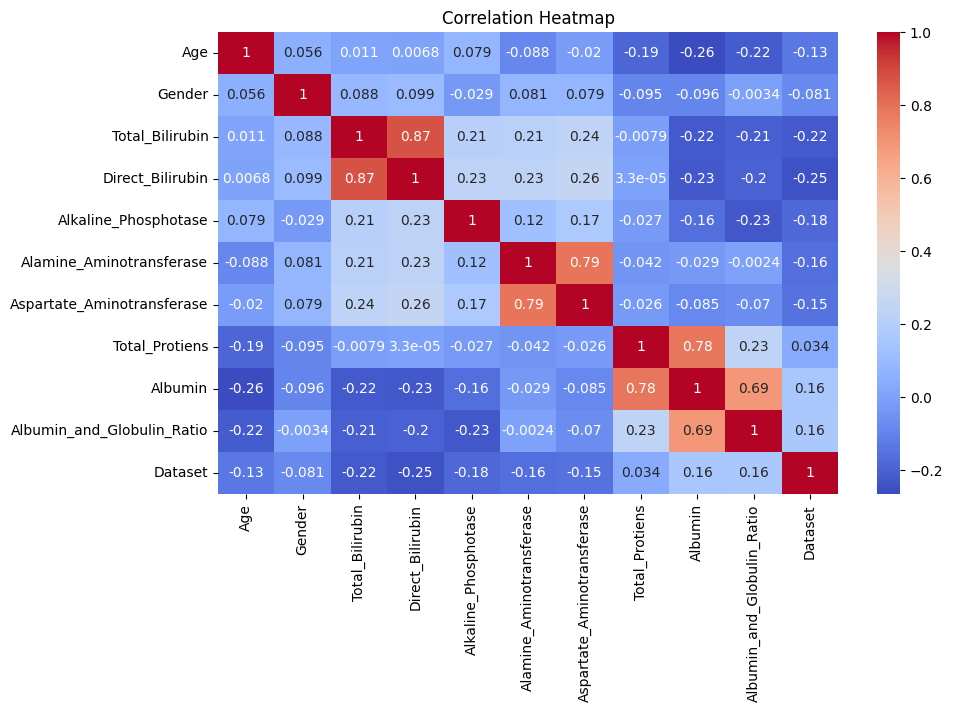

In [20]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

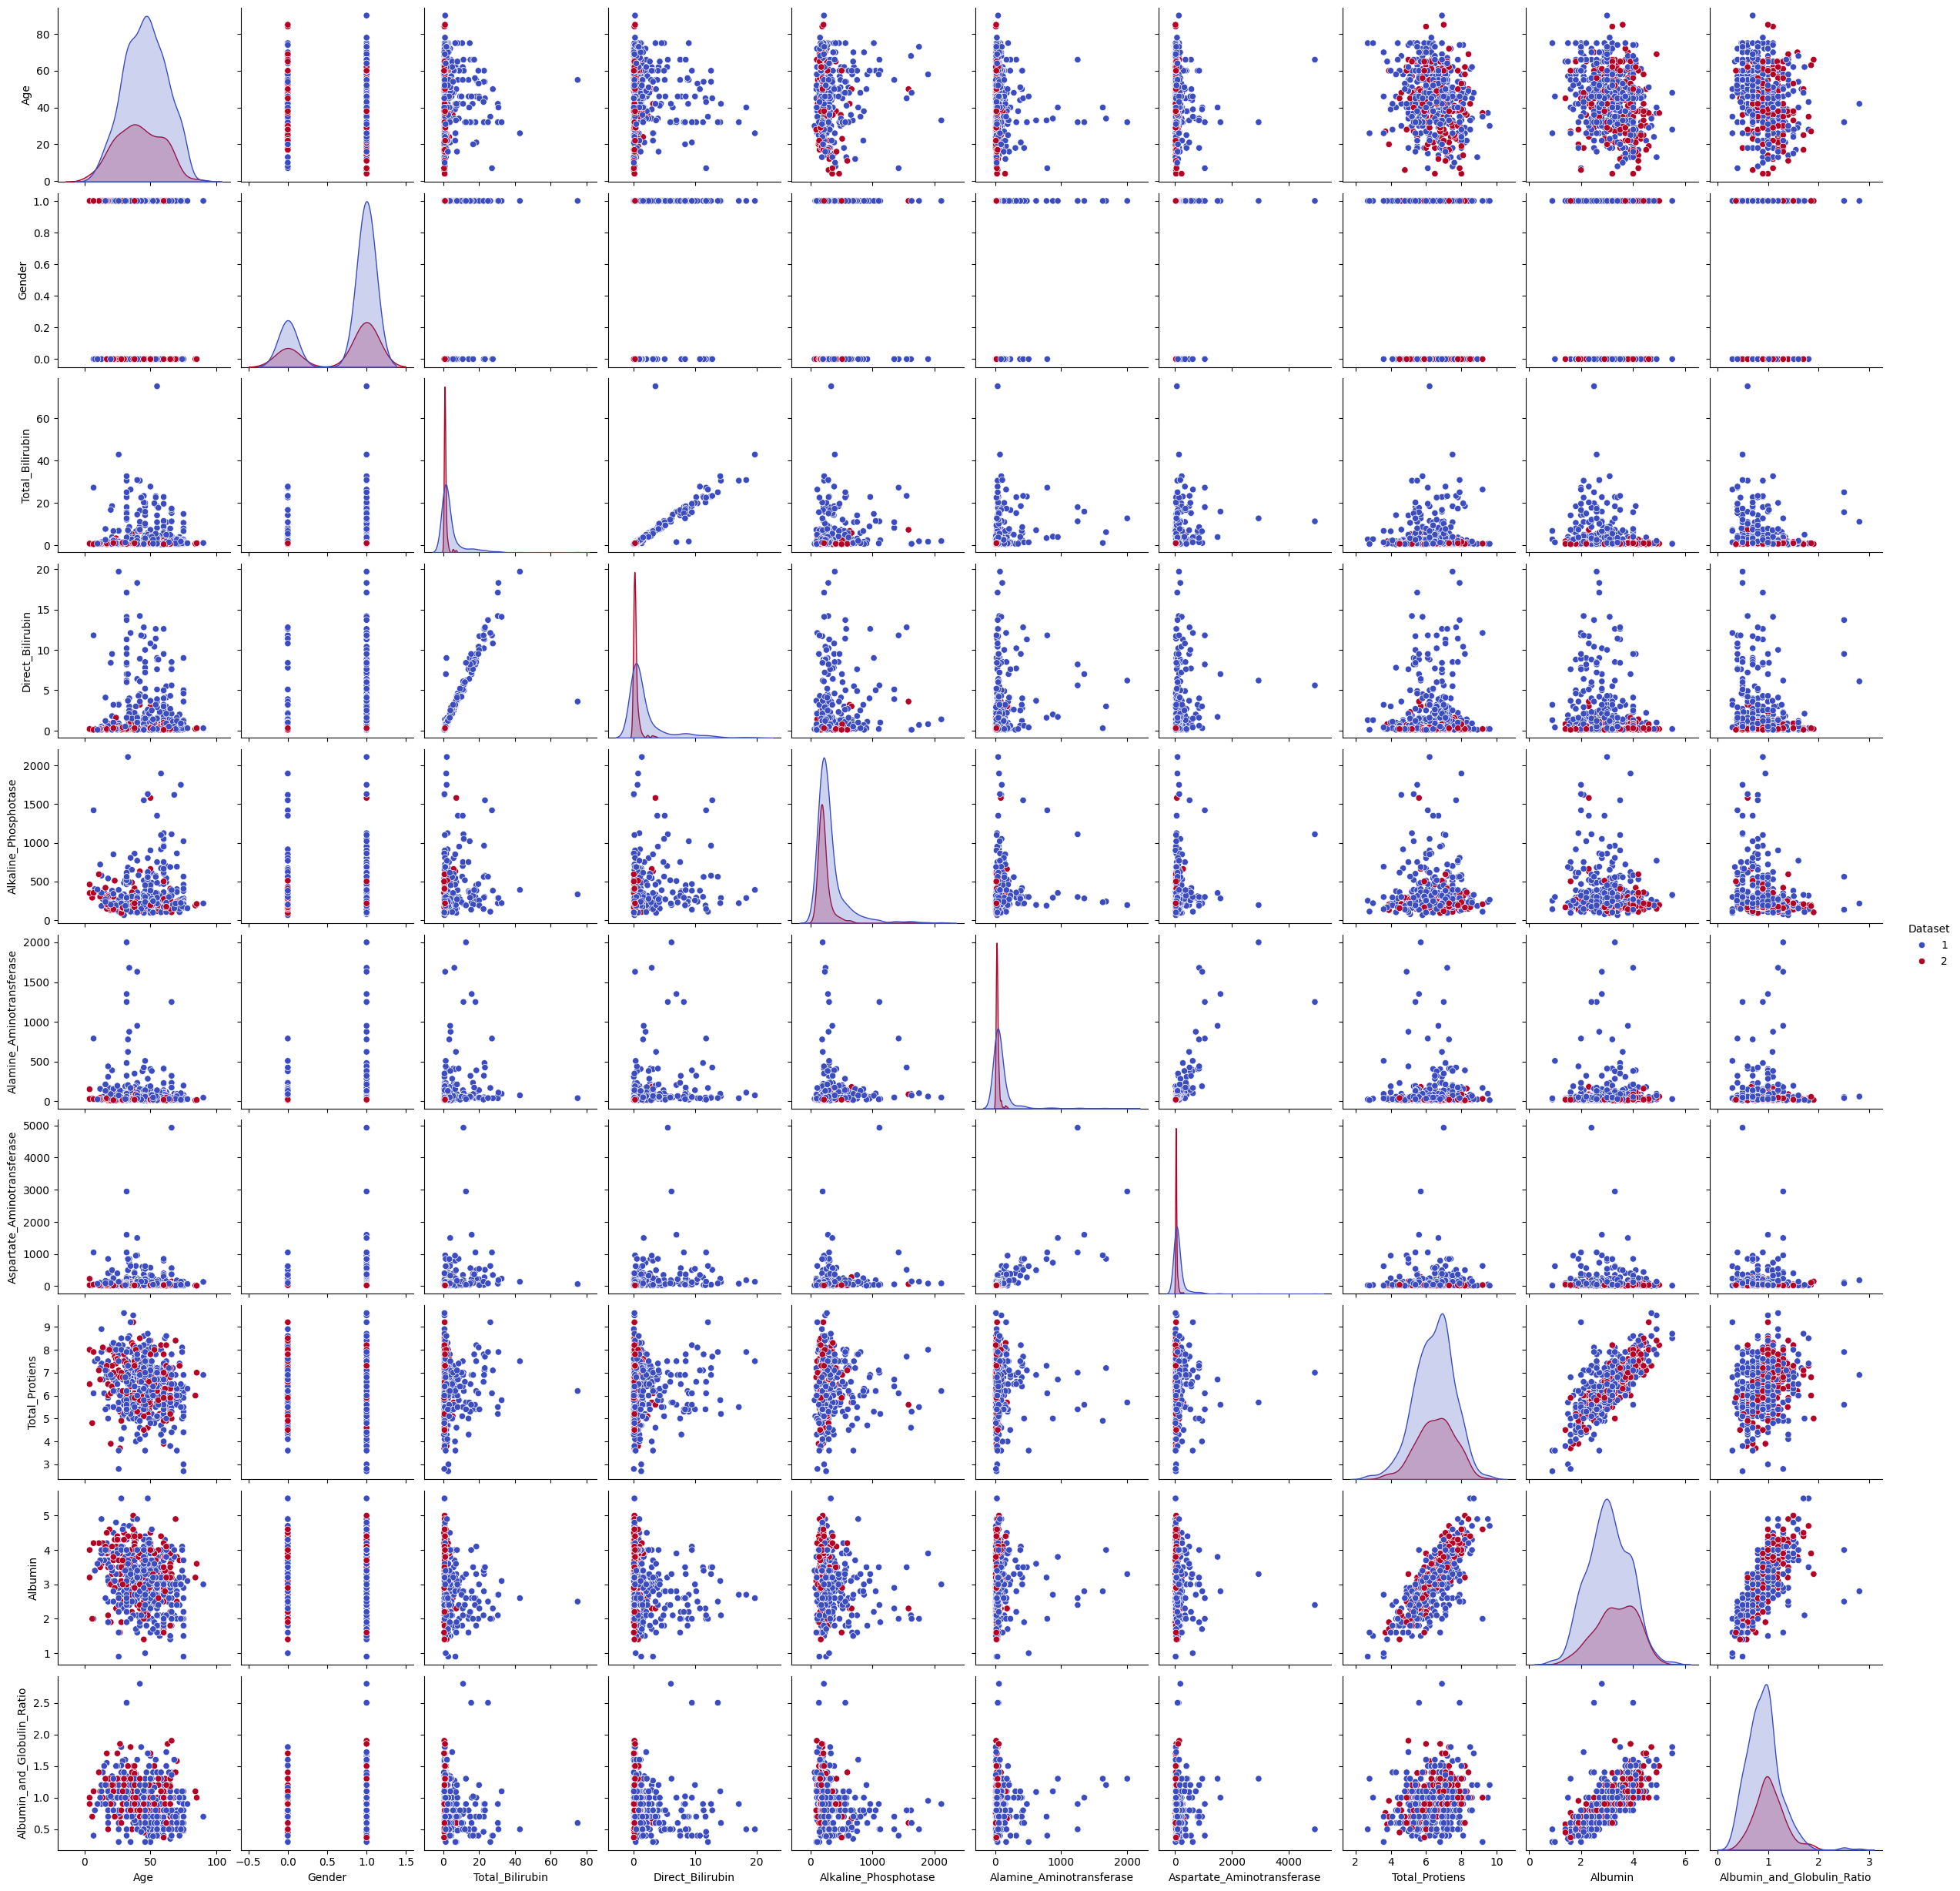

In [21]:
# Plot pairplot to visualize relationships between features
sns.pairplot(data, hue='Dataset', palette='coolwarm')
plt.show()


In [22]:
# spiltting data 
X=data.iloc[::,:-1]
y=data.iloc[::,-1]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(463, 10)
(463,)
(116, 10)
(116,)


In [25]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original dataset shape:", y_train.value_counts())
print("Resampled dataset shape:", pd.Series(y_train_resampled).value_counts())

Original dataset shape: Dataset
1    341
2    122
Name: count, dtype: int64
Resampled dataset shape: Dataset
2    341
1    341
Name: count, dtype: int64


<font size=6>Feature Importance  </font>

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

importance = model.coef_

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  
    'Importance': importance[0]  
})

print(feature_importance)


                      Feature  Importance
0                         Age   -0.012975
1                      Gender    0.075553
2             Total_Bilirubin    0.004869
3            Direct_Bilirubin   -0.431710
4        Alkaline_Phosphotase   -0.000964
5    Alamine_Aminotransferase   -0.010883
6  Aspartate_Aminotransferase   -0.002969
7              Total_Protiens   -0.123305
8                     Albumin    0.233201
9  Albumin_and_Globulin_Ratio    0.329743


c:\Users\nomka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    'Support Vector Classifier':SVC(),
    'KNN':KNeighborsClassifier(),
    'Naive Bayes':GaussianNB(),
    'Bagging':BaggingClassifier()
}


In [28]:

results = {}
for name, model in models.items():
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)  
    cr = classification_report(y_test, y_pred) 
    results[name] = accuracy  

    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification report")
    print(cr)




Model: Logistic Regression
Accuracy: 62.93%
Classification report
              precision    recall  f1-score   support

           1       0.63      0.97      0.77        73
           2       0.50      0.05      0.09        43

    accuracy                           0.63       116
   macro avg       0.57      0.51      0.43       116
weighted avg       0.58      0.63      0.51       116


Model: Random Forest
Accuracy: 65.52%
Classification report
              precision    recall  f1-score   support

           1       0.67      0.88      0.76        73
           2       0.57      0.28      0.38        43

    accuracy                           0.66       116
   macro avg       0.62      0.58      0.57       116
weighted avg       0.64      0.66      0.62       116


Model: Decision Tree
Accuracy: 58.62%
Classification report
              precision    recall  f1-score   support

           1       0.64      0.77      0.70        73
           2       0.41      0.28      0.33     

c:\Users\nomka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nomka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nomka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.p


Model: Naive Bayes
Accuracy: 58.62%
Classification report
              precision    recall  f1-score   support

           1       0.93      0.37      0.53        73
           2       0.47      0.95      0.63        43

    accuracy                           0.59       116
   macro avg       0.70      0.66      0.58       116
weighted avg       0.76      0.59      0.57       116


Model: Bagging
Accuracy: 63.79%
Classification report
              precision    recall  f1-score   support

           1       0.66      0.89      0.76        73
           2       0.53      0.21      0.30        43

    accuracy                           0.64       116
   macro avg       0.59      0.55      0.53       116
weighted avg       0.61      0.64      0.59       116



<font size=06>Model Comparision Report </font>

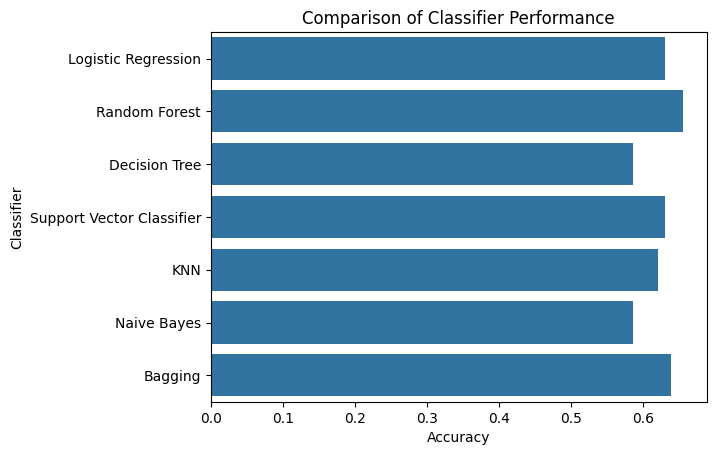

In [29]:
# Compare the performance of each classifier 
# data used here is before performing SMOTE
results_df = pd.DataFrame(list(results.items()), columns=['Classifier', 'Accuracy'])
sns.barplot(x='Accuracy', y='Classifier', data=results_df)
plt.title('Comparison of Classifier Performance')
plt.show()

In [30]:

results = {}
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled) 
    y_pred = model.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)  
    cr = classification_report(y_test, y_pred)  
    results[name] = accuracy  
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification report")
    print(cr)
  


Model: Logistic Regression
Accuracy: 73.28%
Classification report
              precision    recall  f1-score   support

           1       0.88      0.67      0.76        73
           2       0.60      0.84      0.70        43

    accuracy                           0.73       116
   macro avg       0.74      0.75      0.73       116
weighted avg       0.77      0.73      0.74       116


Model: Random Forest
Accuracy: 70.69%
Classification report
              precision    recall  f1-score   support

           1       0.73      0.84      0.78        73
           2       0.64      0.49      0.55        43

    accuracy                           0.71       116
   macro avg       0.69      0.66      0.67       116
weighted avg       0.70      0.71      0.70       116


Model: Decision Tree
Accuracy: 60.34%
Classification report
              precision    recall  f1-score   support

           1       0.68      0.71      0.69        73
           2       0.46      0.42      0.44     

c:\Users\nomka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


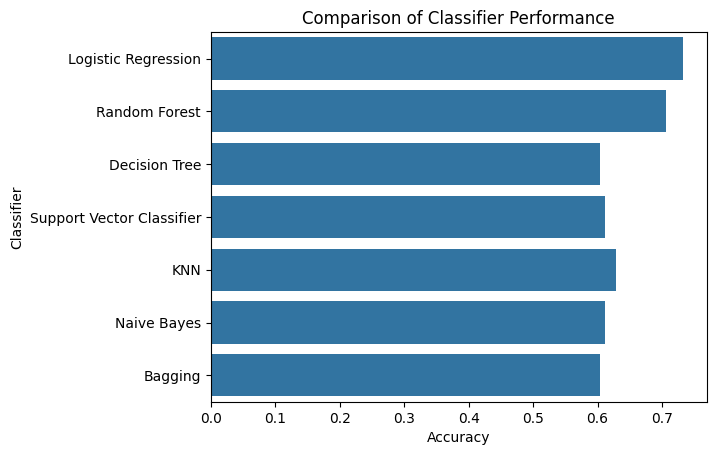

In [31]:
# Compare the performance of each classifier 
# data used here is after performing SMOTE
results_df = pd.DataFrame(list(results.items()), columns=['Classifier', 'Accuracy'])
sns.barplot(x='Accuracy', y='Classifier', data=results_df)
plt.title('Comparison of Classifier Performance')
plt.show()

<font size =06>Hyperparameter Tunning </font>

In [32]:
#Hyperparamter Tunning 

param_dist = {
    'n_estimators': [20, 60, 100, 120],
    'max_features': [0.2, 0.6, 1.0],
    'max_depth': [2, 8, None],
    'max_samples': [0.5, 0.75, 1.0]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,  
    param_distributions=param_dist,  
    n_iter=30, 
    cv=5, 
    verbose=3,  
    random_state=42,  
    n_jobs=-1  
)

random_search.fit(X_train_resampled, y_train_resampled)
print("Best hyperparameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters found:  {'n_estimators': 120, 'max_samples': 1.0, 'max_features': 0.2, 'max_depth': None}
Best score found:  0.8212322885358523


In [33]:
best_rf = random_search.best_estimator_
best_rf.fit(X_train_resampled, y_train_resampled)
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Accuracy: 0.646551724137931
              precision    recall  f1-score   support

           1       0.69      0.81      0.74        73
           2       0.53      0.37      0.44        43

    accuracy                           0.65       116
   macro avg       0.61      0.59      0.59       116
weighted avg       0.63      0.65      0.63       116



In [34]:

with open('trained_model.pkl', 'wb') as file: 
    pickle.dump(model, file)

print("Model saved successfully.")


Model saved successfully.


In [35]:

with open('trained_model.pkl', 'rb') as file:
    model = pickle.load(file)
new_data = {
    'Age': [15],
    'Gender': [1], 
    'Total_Bilirubin': [1.2],
    'Direct_Bilirubin': [0.3],
    'Alkaline_Phosphotase': [100],
    'Alamine_Aminotransferase': [50],
    'Aspartate_Aminotransferase': [45],
    'Total_Protiens': [7.0],
    'Albumin': [3.8],
    'Albumin_and_Globulin_Ratio': [1.1],
}

new_data_df = pd.DataFrame(new_data)
predictions = model.predict(new_data_df)
print("Predicted output:", predictions)


Predicted output: [2]


<font size =6> Challenges in Building Predictive Models for Liver Disease Prediction</font></br>
<div style="line-height: 2;">
1. Data Quality Issues</br>
•	Missing Values: Missing or incomplete data can significantly affect model performance.</br>
•	Outliers: Extreme values in features like bilirubin or enzyme levels can distort the model.</br>
•	Imbalanced Data: If the dataset has an unequal number of positive (liver disease) and negative (no disease) cases, classifiers may be biased toward the majority class.</br>
2. Feature Selection and Engineering</br>
•	Feature Correlation: Features like Total_Bilirubin and Direct_Bilirubin might be highly correlated, leading to redundancy.</br>
•	Irrelevant Features: Non-informative features can introduce noise into the model.</br>
•	Feature Scaling: Variables such as enzyme levels (Alkaline_Phosphotase, Alamine_Aminotransferase) might vary in scale and need normalization for distance-based algorithms like KNN or SVM.</br>
•	Domain Knowledge: Medical domain expertise is needed to determine the relevance of certain features for liver disease.</br>
3. Model Selection</br>
•	Choosing Classifiers: Different classifiers (e.g., Logistic Regression, Random Forest, SVM, etc.) have unique strengths, but selecting the right one depends on the data structure and nature of the prediction task.</br>
•	Overfitting: Complex models like Decision Trees or Deep Neural Networks might overfit, especially if the dataset is small or noisy.</br>
•	Hyperparameter Tuning: Finding optimal parameters for classifiers like SVM or Random Forest can be time-consuming and computationally expensive.</br>
4. Evaluation Challenges</br>
•	Performance Metrics: Traditional accuracy might not be suitable for imbalanced datasets. Metrics like precision, recall, F1-score, and AUC-ROC should be prioritized.</br>
•	Cross-Validation: Over-reliance on a single train-test split might lead to misleading results, so cross-validation is crucial.
5. Computational Complexity</br>
•	Time and Resources: Training complex models on large datasets (e.g., ensemble methods like Random Forest or Gradient Boosting) may require significant computational power.</br>
•	Feature Reduction: Techniques like PCA or L1 regularization may be needed to reduce dimensionality without losing too much predictive power.</br>
</div>


<font size=6>2. Analysis of Model Design for Liver Disease Prediction</br></font>
<div style="line-height: 2;">
1.Data Preprocessing</br>
•	Handling Missing Values: Impute missing values using the mean or median for continuous variables such as Total_Bilirubin and  domain-specific knowledge (e.g., medical thresholds) to fill in values.</br>
•	Feature Scaling: Applied normalization (e.g., Min-Max scaling) to features with different scales, such as enzyme levels and protein ratios, to ensure that models like KNN and SVM perform optimally.</br>
2. Feature Selection</br>
•	Correlation Analysis: Perform a correlation matrix analysis to identify highly correlated features (e.g., Total_Bilirubin vs. Direct_Bilirubin), and considering using only one representative feature to avoid multicollinearity.</br>
•	Feature Importance: Use techniques like Random Forest's feature_importances_ or Lasso (L1 regularization) to identify the most influential features in predicting liver disease.</br>
•	Domain Expertise: Include relevant features based on medical studies, such as the ratio of albumin to globulin, which is a known marker for liver health.</br>
3. Model Selection</br>
•	Baseline Model: Start with a simple model like Logistic Regression to establish a baseline. That will give an early indication of which features are most informative and how the data behaves.</br>
•	Advanced Classifiers:</br>
•	Random Forest: To handle non-linearity and interactions between variables.</br>
•	SVM: To separate data points with a clear margin, particularly useful if the data is not linearly separable.</br>
•	KNN: For a non-parametric approach that doesn’t make assumptions about data distribution.</br>
•	Gradient Boosting (XGBoost or LightGBM): To capture complex interactions and achieve higher accuracy through boosting techniques.</br>
4. Evaluation Strategy</br>
•	Train-Test Split: Split the dataset into training and test sets (e.g., 80% train, 20% test) to ensure the model generalizes well.</br>
•	Cross-Validation: Implement k-fold cross-validation (e.g., k=5 or 10) to avoid overfitting and ensure robust evaluation.</br>
•	Metrics:</br>
•	Accuracy: A general measure of performance, but not the only one.</br>
•	Precision and Recall: These are crucial metrics for healthcare, where false negatives (i.e., predicting no disease when disease is present) could have severe consequences.</br>
•	F1-Score: Balances precision and recall, providing a comprehensive performance measure.</br>
•	AUC-ROC: To evaluate how well the model distinguishes between classes, especially in imbalanced datasets.</br>
5. Hyperparameter Tuning</br>
•	Grid Search or Random Search: Use hyperparameter optimization techniques like GridSearchCV or RandomizedSearchCV to fine-tune models.</br>
•	Tuning Parameters:</br>
•	For SVM: Kernel type, C, and gamma.</br>
•	For Random Forest: Number of trees, maximum depth, and minimum samples split.</br>
</div>
